# Love and War: Stylometry in Latin Poetry

In this lab, we're going to use word counts to look at the difference between two genres of Latin poetry, Epic and Elegy.
<div class="alert alert-info" style="margin:0.5em; 2em;">
<h5>Epic</h5>
<ul>
    <li>Treats grand events from mythology and history: e.g., the Trojan War, Jason and the Argonauts, the founding of Rome.</li>
    <li>Long poems (10,000 lines or more), divided into chapter-like "books."</li>
    <li>Written as a continous series of hexameter lines.</li>
    <li>Elevated style and diction.</li>
</ul>
</div>
<div class="alert alert-info" style="margin:0.5em; 2em;">
<h5>Elegy</h5>
<ul>
    <li>Treats personal issues—especially love, but also friendships and grudges.</li>
    <li>Shorter poems (tens to hundreds of lines), arranged loosely in groups.</li>
    <li>Lines are grouped in couplets: one hexameter and one pentameter.</li>
    <li>Diction is often lower—includes conversational and vulgar language.</li>
</ul>
</div>

### The corpus

These are the texts I've chosen to represent each genre.

#### Epics

<table class="table table-striped">
    <thead>
        <tr>
            <th>Author</th>
            <th>Title</th>
            <th>Date</th>
            <th>Lines</th>
            <th>Divided into</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Vergil</td>
            <td><em>Aeneid</em></td>
            <td>19 BCE</td>
            <td>9896</td>
            <td>12 Books</td>
        </tr>
        <tr>
            <td>Lucan</td>
            <td><em>Civil War</em></td>
            <td>65 CE</td>
            <td>8061</td>
            <td>10 Books</td>
        </tr>
        <tr>
            <td>Statius</td>
            <td><em>Thebaid</em></td>
            <td>90s CE</td>
            <td>9731</td>
            <td>12 Books</td>
        </tr>
        <tr>
            <td>Valerius Flaccus</td>
            <td><em>Argonautica</em></td>
            <td>90s CE</td>
            <td>5592</td>
            <td>8 Books</td>
        </tr>
    </tbody>
</table>

#### Elegies

<table class="table table-striped">
    <thead>
        <tr>
            <th>Author</th>
            <th>Title</th>
            <th>Date</th>
            <th>Lines</th>
            <th>Divided into</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Catullus</td>
            <td>Poems 65–116</td>
            <td>50s BCE</td>
            <td>643</td>
            <td>—</td>
        </tr>
        <tr>
            <td>Tibullus</td>
            <td><em>Elegies</em> (Books 1 and 2)</td>
            <td>30–20 BCE</td>
            <td>1241</td>
            <td>2 Books</td>
        </tr>
        <tr>
            <td>Propertius</td>
            <td><em>Elegies</em></td>
            <td>20s–10s BCE</td>
            <td>3982</td>
            <td>4 Books</td>
        </tr>
        <tr>
            <td>Ovid</td>
            <td><em>Amores</em></td>
            <td>10s (?) BCE</td>
            <td>2458</td>
            <td>3 Books</td>
        </tr>
        <tr>
            <td>Pseudo-Tibullus (perhaps several authors)</td>
            <td>Transmitted with Tibullus as <em>Elegies</em> Book 3</td>
            <td>1st century CE (??)</td>
            <td>684</td>
            <td>—</td>
        </tr>
    </tbody>
</table>

### Data and sources

The texts we're using today were all drawn from online, public-domain or open-source editions. The Latin texts I occasionally refer to are all from the [Perseus Digital Library](http://www.perseus.tufts.edu/hopper/); Perseus in turn digitized and hand-corrected them from out-of-copyright editions of the late 19th and early 20th centuries. You can browse Perseus' library [here](http://scaife.perseus.org/), or download their entire Latin collection in (XML format) [here](https://github.com/PerseusDL/canonical-latinLit).

The English texts we'll use for most of the lab are from a couple of places, but all essentially go back to out-of-copyright volumes from the [Loeb Classical Library](https://www.loebclassics.com/page/history). Catullus is from Perseus. Most of the epic authors are from the [Theoi Texts Library](http://theoi.com/Library.html) in New Zealand. The rest I got by searching for specific Loebs at the [Internet Archive](https://archive.org/).

I've modified all of these texts to make them easier for us to use. Depending on the source, digital texts can be easy to work with or very difficult; Perseus' texts are formatted so that you can download and manipulate them easily using scripts; the Internet Archive texts, on the other hand, are just raw text—often uncorrected OCR, which means they have lots weird "typos."

You can browse the texts using Jupyter's dashboard. Click on the `texts` folder, and then the `latin` or `english` subfolder, and then pick a text to examine. If you have trouble finding the files, just let me know and I can help out.

<div class="alert alert-warning">
<h5>✏️ Analysis</h5>
<p>Before moving on, take a moment with your group to **look at the data summary** above. Then **skim through one or two of the text files.**</p>
<ul>
    <li>Do you notice any patterns, trends, or systematic differences between the groups?</li>
    <li>Do any of the texts stand out as anomalous?</li>
    <li>Does anyone in your group know something interesting about these authors or works?</li>
    <li>Can you suggest any possible sources of bias we might want to watch out for?</li>
</ul>
<p>Spend a few minutes talking it over, then **write a brief response** in the cell below.</p>
</div>

## Preliminaries

For this lab, I've written a lot of the code we'll need ahead of time. Please run the following cell to get started. 

In [60]:
# for dealing with files and directories
import os

# for string processing
import re

# for dictionary-like counters
from collections import Counter

# for graphing
import numpy
from matplotlib import pyplot
%matplotlib inline

### Read the directory

The following code snippet reads the contents `texts/english` directory.
   - files ending with `.txt` are saved to a list called `files`

<div class="alert alert-info" style="margin:0.5em 2em;">
👉🏻 If you want to try processing the Latin files later, just change `english` to `latin` and re-run this cell.
</div>

In [58]:
# choose a folder to work with
folder = os.path.join('texts', 'english')

# create a list of files
files = []
for f in os.listdir(folder):
    if f.endswith('.txt'):
        files.append(f)

# reorder the list alphabetically
files.sort()

### Create a list of genre labels

To help keep our data organized, it's useful to have another list, *in the same order*, that gives the genre for each of the files. The code below assigns each file to a genre based on the author's name, which is built into the file name.

In [59]:
# start with an empty list
genres = []

for file in files:
    
    # author is first element of filename
    auth = file.split('.')[0]
    
    # assign genre
    if auth in ['lucan', 'statius', 'valerius_flaccus', 'vergil']:
        genre = 'epic'
    else:
        genre = 'elegy'
        
    # add genre to list
    genres.append(genre)

<div class="alert alert-warning">
<h5>✏️ Double check</h5>
<p>
Before moving on, check the contents of the two lists against the names of the files in the `texts/english` folder.
</p>
<ul>
    <li>In the cell below, **write a `for` loop** to print out each of the items in `files`.</li>
    <li>Do the same for `genres`.</li>
</ul>
<p>🤔 Can you come up with a way to print the lists side by side? (One way comes up below.)</p>

## Counting words

The following code defines a new function, `wordCount()`:
  - it takes a file as its argument
  - it returns a dictionary (actually, a dictionary-like object called a [*Counter*](https://docs.python.org/3.6/library/collections.html#counter-objects)).

Run the cell, then proceed with the example below.

In [65]:
def wordCount(path, normalize=False):
    '''Read a text file and produce a set of word counts as a Counter.'''
    
    # a dictionary to collect the word counts
    wc = Counter()
    
    # open the file
    file = open(path)
    
    # process each line in turn:
    #  - cut off the line number tags
    #  - make the line lowercase
    #  - remove all non-letter characters
    #  - break into words
    #  - make sure there are no empty strings
    
    for line in file:

        # separate the latin text from the line number
        if '\t' in line:
            text = line.split('\t')[-1]
        else:
            text = line
            
        # sanitize
        text = re.sub(pattern='[^a-z ]', repl='', string=text)
        
        # split into words
        words = text.split()
        
        # add words to counter
        wc.update(words)
          
    # optional normalization to freq per thousand words
    if normalize:
        total = sum(wc.values())
        for word in wc:
            wc[word] = round(1000 * wc[word] / total, 2)

    return wc

#### Example

```python
# pick a file to examine; don't forget to add the folder name
file = os.path.join(folder, 'lucan.civil_war_07.txt')

# call the function and assign the result to a variable
wc = wordCount(file)

# check a specific word count
print(wc['caesar'])
```

<div class="alert alert-warning">
<h5>✏️ Try it out</h5>
<p>
Test the function on book 1 of Vergil's *Aeneid*. How many times does this book refer to . . .
</p>
<ul>
    <li>Aeneas</li>
    <li>Dido</li>
    <li>Troy</li>
    <li>Rome</li>
</ul> 
<p><strong>Show your code</strong> in the cell below. 🤔 Can you use a loop to check all these words?</p>
<p>If you find you're getting the hang of it, then try some other words, or maybe a different book for comparison.</p> 
</div>

### A toy model of genre

Let's start with a comparison of word counts for a couple of important thematic words for these genres: "arms" (Latin *arma*) and "love" (Latin *amor*).

<div class="alert alert-info" style="margin: 0.5em 2em;">
<p><strong><em>arma</em></strong>, famously the first word of Vergil's *Aeneid*, is a key word for epic. Its meaning takes in both weapons and armour: swords and spears used for attack, but also the divine shield made for Aeneas. It's not completly absent from elegy, though. A common elegiac trope compares the lover to a soldier on campain; and Ovid uses the word to open his *Amores* as a kind of literary joke on Vergil.</p>
<p><strong><em>amor</em></strong> means "love," either in the abstract or personified as Cupid. In the plural it means "love affairs." Obviously a principal theme of elegy, it also has an important place in epic: think of the affairs of Aeneas and Dido, Jason and Medea, among others.</p>
</div>

In the code below, `wordCount()` is called on each of the files in turn. A summary table is produced comparing counts for 'arms' and 'love', listed alongside the file and genre labels.

In [35]:
# iterate over file and genre tags together
for file, genre in zip(files, genres):
    
    # get file path and call wordCount
    path = os.path.join(folder, file)
    wc = wordCount(path)
    
    # check 
    arms = wc.get('arms', 0)
    love = wc.get('love', 0)

    print('{}\t{}\t{}\t{}\t{}'.format(genre, arms, love, love/arms > 2, file))

elegy	0.16	4.85	True	catullus.elegiacs.txt
epic	1.3	0.39	False	lucan.civil_war_01.txt
epic	1.41	0.35	False	lucan.civil_war_02.txt
epic	1.78	0.36	False	lucan.civil_war_03.txt
epic	1.19	0.22	False	lucan.civil_war_04.txt
epic	1.05	0.42	False	lucan.civil_war_05.txt
epic	0.32	0.32	False	lucan.civil_war_06.txt
epic	0.81	0.2	False	lucan.civil_war_07.txt
epic	0.69	0.3	False	lucan.civil_war_08.txt
epic	0.54	0.7	False	lucan.civil_war_09.txt
epic	0.64	0.8	False	lucan.civil_war_10.txt
elegy	2.1	5.26	True	ovid.amores_01.txt
elegy	1.69	5.64	True	ovid.amores_02.txt
elegy	0.72	5.32	True	ovid.amores_03.txt
elegy	0.94	10.38	True	propertius.elegies_01.txt
elegy	0.9	6.62	True	propertius.elegies_02.txt
elegy	1.35	4.71	True	propertius.elegies_03.txt
elegy	1.06	1.25	False	propertius.elegies_04.txt
elegy	1.13	3.25	True	ps_tibullus.poems.txt
epic	0.93	0.8	False	statius.thebaid_01.txt
epic	1.12	0.62	False	statius.thebaid_02.txt
epic	2.05	0.13	False	statius.thebaid_03.txt
epic	1.33	0.44	False	statius.thebaid_04.

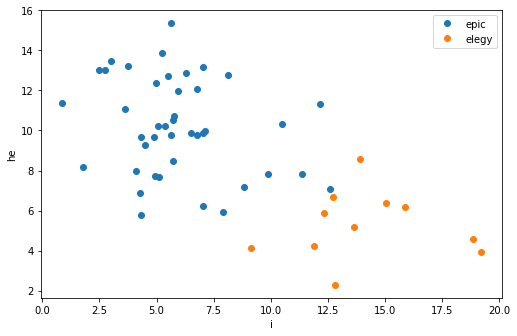

In [43]:
from matplotlib import pyplot
%matplotlib inline
import numpy

# choose two words to graph
x_word = 'i'
y_word = 'he'

# create a graph
fig = pyplot.figure(figsize=(8,5))
ax = fig.add_axes([.1, .1, .8, .8])
ax.set_xlabel(x_word)
ax.set_ylabel(y_word)

# collect word counts
x_vals = []
y_vals = []

for file in files:
    path = os.path.join(folder, file)
    wc = wordCount(path, True)

    x_vals.append(wc.get(x_word, 0))
    y_vals.append(wc.get(y_word, 0))

# use numpy for easier array slicing
x = numpy.array(x_vals)
y = numpy.array(y_vals)
g = numpy.array(genres)

# plot epic and elegy as two series
ax.plot(x[g=='epic'], y[g=='epic'], marker='o', linestyle='', label='epic')
ax.plot(x[g=='elegy'], y[g=='elegy'], marker='o', linestyle='', label='elegy')
ax.legend()


In [37]:
wc_total = {}

for file in files:
    path = os.path.join(folder, file)
    wc = wordCount(path)
    
    for word in wc:
        wc_total[word] = wc_total.get(word, 0) + wc[word]

top_500 = sorted(wc_total, key=wc_total.get, reverse=True)[:500]
print(top_500)

['the', 'and', 'of', 'to', 'in', 'his', 'with', 'a', 'that', 'he', 'i', 'from', 'is', 'for', 'her', 'by', 'my', 'on', 'their', 'but', 'not', 'was', 'as', 'all', 'it', 'they', 'me', 'thou', 'thy', 'be', 'when', 'she', 'at', 'now', 'him', 'you', 'or', 'are', 'no', 'so', 'have', 'this', 'then', 'nor', 'had', 'your', 'will', 'what', 'thee', 'upon', 'who', 'if', 'them', 'has', 'were', 'our', 'one', 'shall', 'its', 'yet', 'let', 'there', 'even', 'such', 'own', 'we', 'first', 'through', 'would', 'love', 'gods', 'more', 'sea', 'war', 'these', 'death', 'down', 'may', 'do', 'arms', 'over', 'while', 'hand', 'thus', 'which', 'long', 'up', 'too', 'men', 'forth', 'where', 'an', 'though', 'out', 'come', 'whom', 'before', 'blood', 'heaven', 'himself', 'many', 'into', 'back', 'earth', 'did', 'night', 'away', 'land', 'o', 'here', 'eyes', 'how', 'mighty', 'once', 'great', 'us', 'should', 'ye', 'see', 'than', 'against', 'far', 'words', 'heart', 'hands', 'father', 'any', 'ever', 'son', 'high', 'day', 'wate

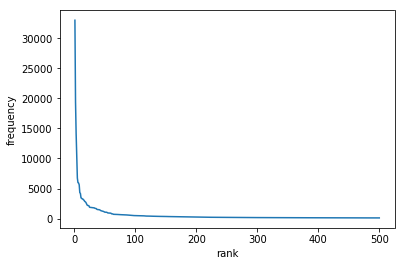

In [38]:
rank = range(1, 501)
freq = [wc_total[word] for word in top_500]

pyplot.plot(rank, freq)
pyplot.xlabel('rank')
pyplot.ylabel('frequency')
pyplot.show()

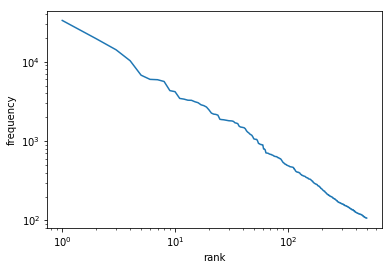

In [39]:
pyplot.loglog(rank, freq)
pyplot.xlabel('rank')
pyplot.ylabel('frequency')
pyplot.show()

Calculating 10 principal components


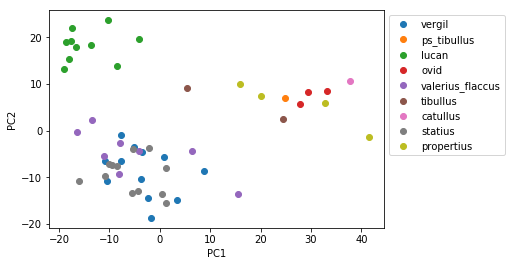

In [52]:
%matplotlib inline
from sklearn import decomposition

# build feature vectors
data = []

for file in files:
    path = os.path.join(folder, file)
    wc = wordCount(path, True)

    this_vec = [wc.get(w, 0) for w in top_500]
    data.append(this_vec)
    
data = numpy.array(data)

# create author labels
authors = []
for f in files:
    author = f.split('.')[0]
    authors.append(author)

# reduce dimensionality with PCA
npcs = 10
print('Calculating {} principal components'.format(npcs))
pcmodel = decomposition.PCA(npcs)
pca = pcmodel.fit_transform(data)

# create a graph
fig, ax = pyplot.subplots()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# use numpy for easier array slicing
x = pca[:,0]
y = pca[:,1]
a = numpy.array(authors)

# plot each author as a separate series
for auth in set(a):
    ax.plot(x[a==auth], y[a==auth], marker='o', linestyle='', label=auth)    
ax.legend(loc="upper left", bbox_to_anchor=(1,1))

### 3d plot

In [ ]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
from sklearn import decomposition

# leave out lucan
some_files = numpy.array([f for f in files if not f.startswith('lucan')])

# build feature vectors
data = []

for file in some_files:
    path = os.path.join('texts', 'raw', file)
    wc = wordCount(path)

    this_vec = [wc.get(w, 0) for w in top_500]
    data.append(this_vec)
    
data = numpy.array(data)

# create author labels
authors = []
for f in some_files:
    author = f.split('.')[0]
    authors.append(author)

# reduce dimensionality with PCA
npcs = 10
print('Calculating {} principal components'.format(npcs))
pcmodel = decomposition.PCA(npcs)
pca = pcmodel.fit_transform(data)

# create a graph
fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# use numpy for easier array slicing
x = pca[:,0]
y = pca[:,1]
z = pca[:,2]
g = numpy.array(genres)
a = numpy.array(authors)

# plot each author as a separate series
for auth in set(a):
    ax.scatter(x[a==auth], y[a==auth], z[a==auth], marker='o', label=auth)
    
ax.legend()

In [ ]:
pca.shape

In [ ]:
pyplot.plot(pca[:,0], pca[:,1], marker='o', linestyle='')

In [ ]:
%matplotlib notebook
from sklearn import decomposition

def fingerprint(start=0, end=500):
    features = sorted(wc_total, key=wc_total.get, reverse=True)[start:end]
    print(len(features), " features")

    # build feature vectors
    data = []

    for file in some_files:
        path = os.path.join('texts', 'raw', file)
        wc = wordCount(path)

        this_vec = [wc.get(w, 0) for w in features]
        data.append(this_vec)

    data = numpy.array(data)

    # create author labels
    authors = []
    for f in some_files:
        author = f.split('.')[0]
        authors.append(author)

    # reduce dimensionality with PCA
    npcs = 10
    print('Calculating {} principal components'.format(npcs))
    pcmodel = decomposition.PCA(npcs)
    pca = pcmodel.fit_transform(data)

    # create a graph
    fig, ax = pyplot.subplots()
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')

    # use numpy for easier array slicing
    x = pca[:,0]
    y = pca[:,1]
    g = numpy.array(some_genres)
    a = numpy.array(authors)

    # plot each author as a separate series
    for auth in set(a):
        ax.plot(x[a==auth], y[a==auth], marker='o', linestyle='', label=auth)    
    ax.legend()

In [ ]:
from ipywidgets import interact
interact(fingerprint, start=(0,500), end=(10, 1000))

9807

0